<a href="https://colab.research.google.com/github/perceptiveperceval/ML-project/blob/main/Project-extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning respo.

In [ ]:
!git clone https://github.com/perceptiveperceval/ML-project.git

Cloning into 'ML-project'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


Importing stuffs

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Split data

In [ ]:
#splitting train/test data
target=data.pop("Churn")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data,target,test_size=0.2, random_state=123)


Feature selection


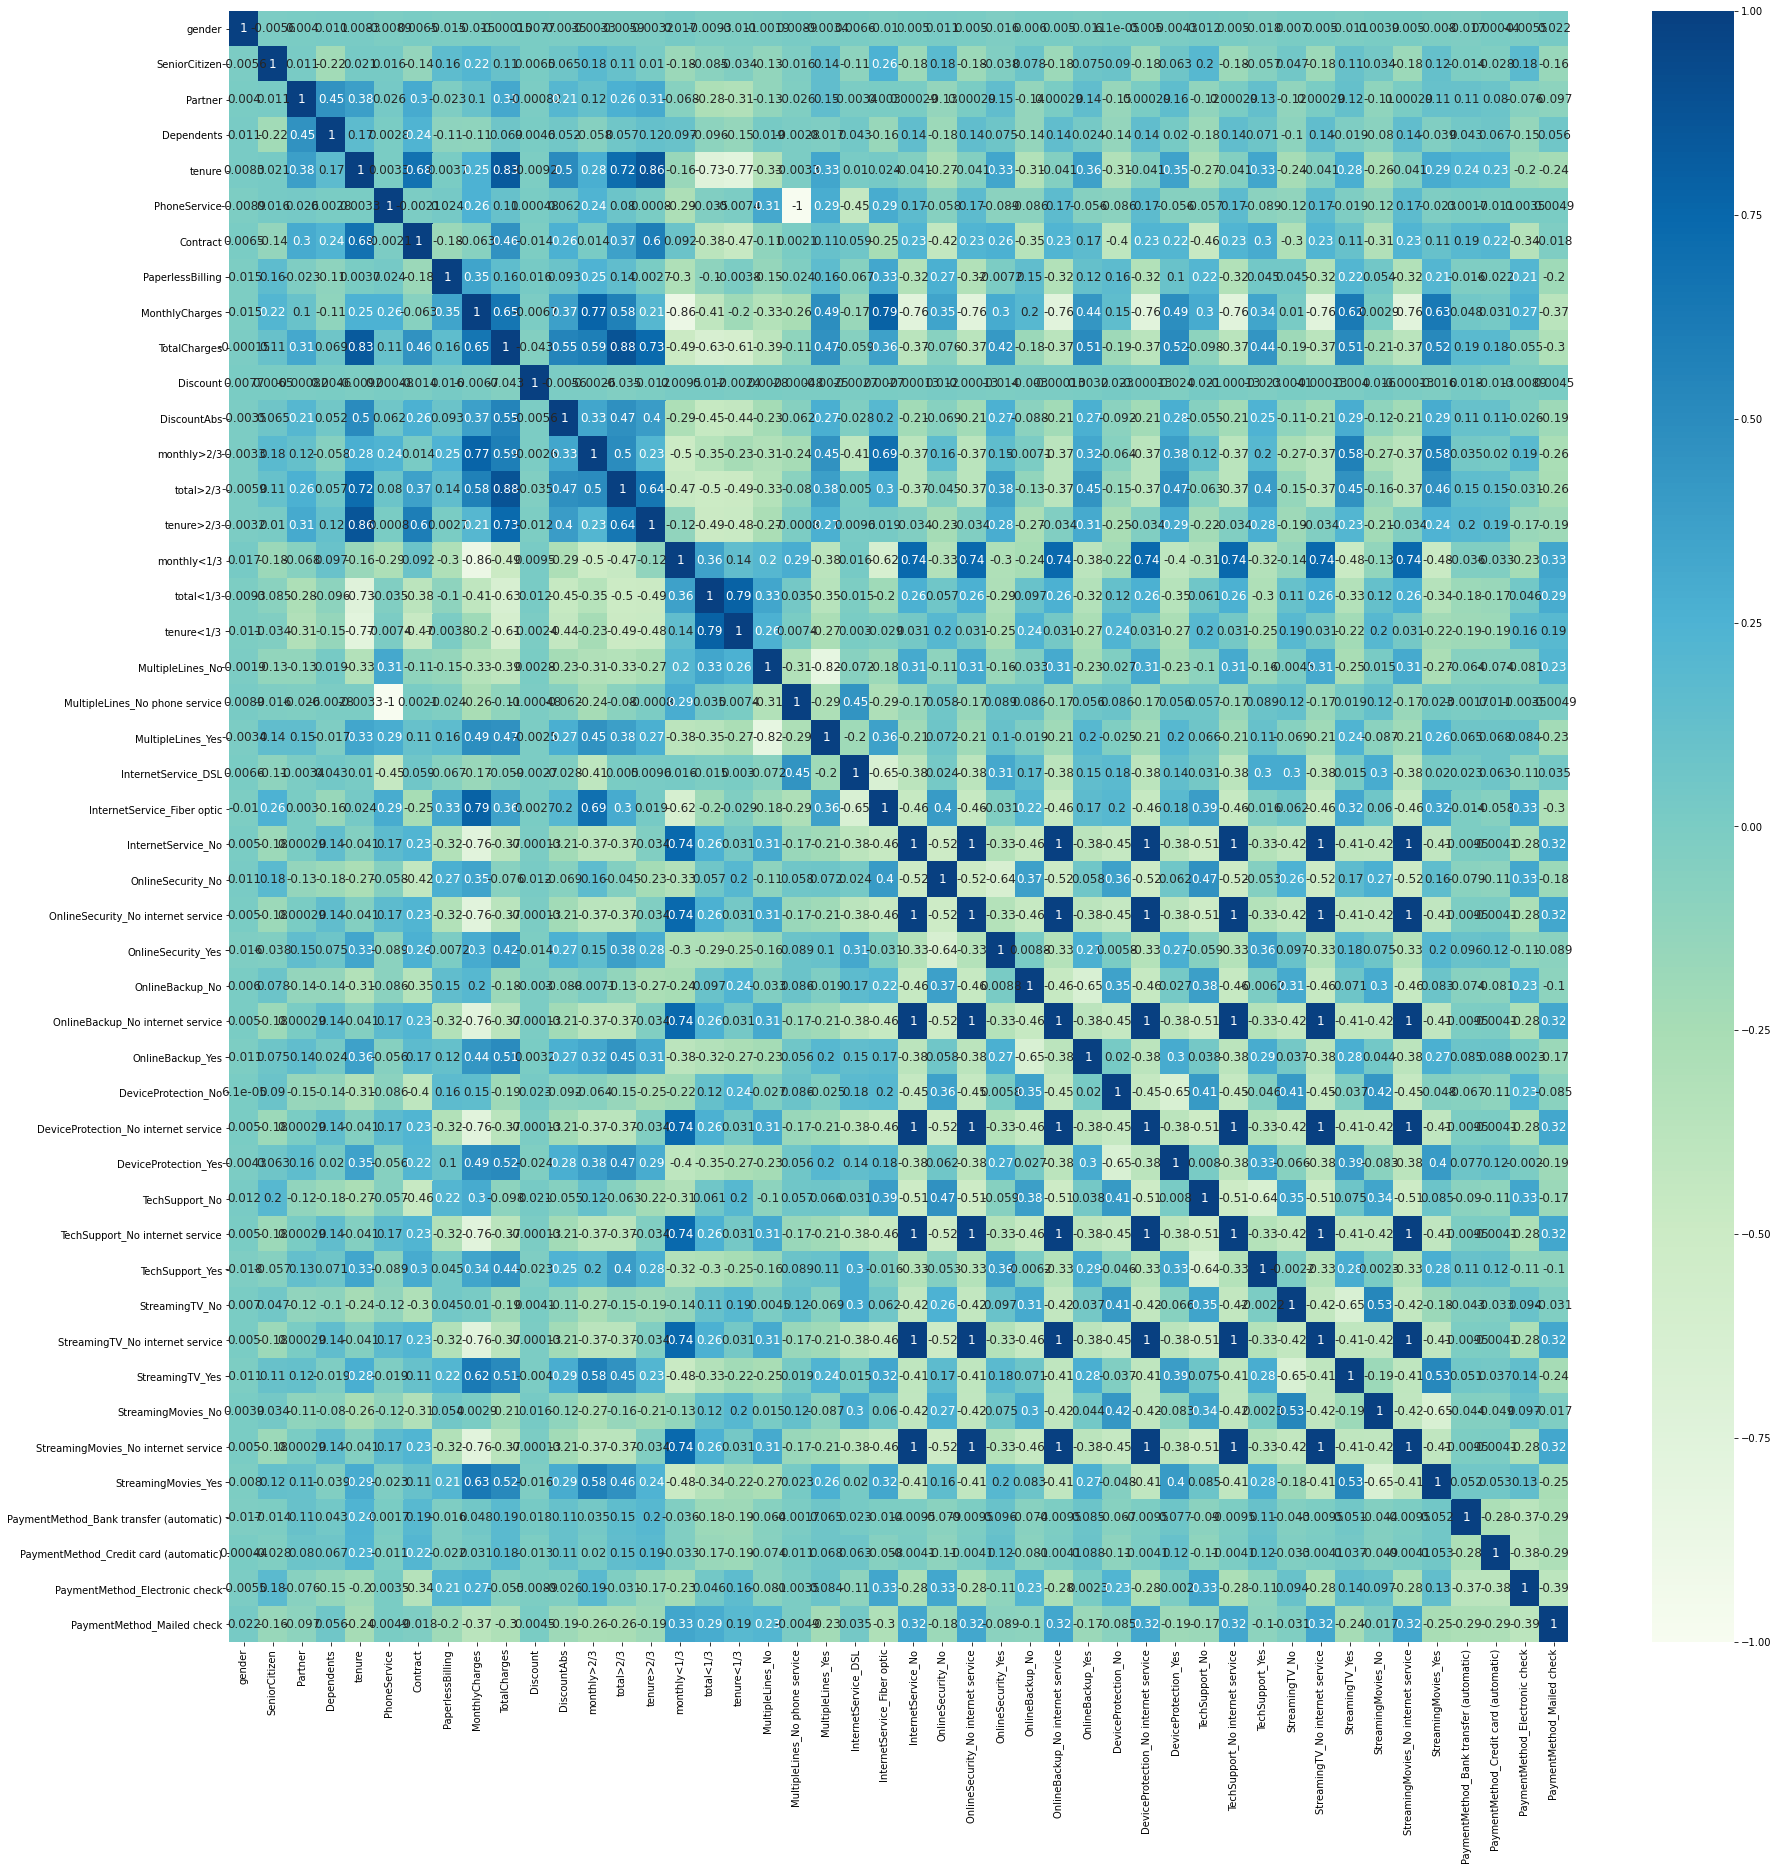

In [ ]:
corr_matrix = X_train.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix,annot = True,cmap="GnBu", annot_kws={'size':12})

In [ ]:
#Drop No_internet, No phone service since they completely correlate with others feature i.e PhoneService, InternetService_No
X_train.drop(["OnlineSecurity_No internet service",
              "OnlineBackup_No internet service",
              "DeviceProtection_No internet service",
              "TechSupport_No internet service",
              "StreamingTV_No internet service",
              "StreamingMovies_No internet service",
              "MultipleLines_No phone service",],axis=1,inplace=True)
X_test.drop(["OnlineSecurity_No internet service",
              "OnlineBackup_No internet service",
              "DeviceProtection_No internet service",
              "TechSupport_No internet service",
              "StreamingTV_No internet service",
              "StreamingMovies_No internet service",
              "MultipleLines_No phone service"],axis=1,inplace=True)




/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


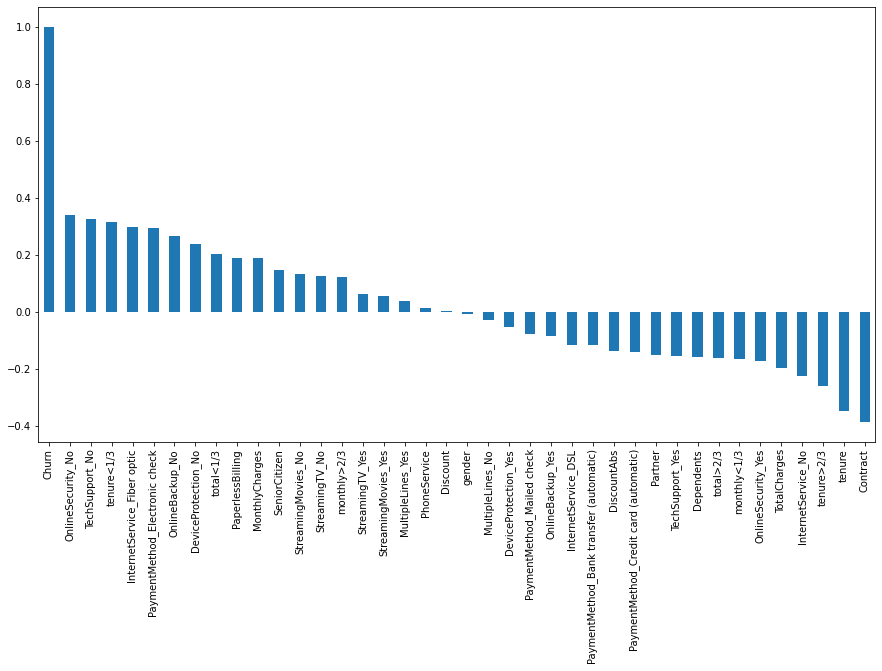

In [ ]:
churn_correlation_data = X_train.copy(deep=True)
churn_correlation_data["Churn"]=y_train
plt.figure(figsize=(15,8))
churn_correlation_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
#Feature scaling
#Maybe try different scaler?
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_train)

Test Logistics regression

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
#grid search
model_gs = LogisticRegression(max_iter=500)

# define grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_gs, param_grid=(grid), n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0,verbose=1)
grid_result = grid_search.fit(X_train, y_train)



ValueError: ignored

Print result

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat_test = grid_result.predict(X_test)
cm=confusion_matrix(y_test,y_hat_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
#print(precision_recall_fscore_support(y_hat_test0, y_test0))
print(classification_report(y_hat_test, y_test))
print("Accuracy: ", accuracy_score(y_test, y_hat_test))